# Task 2
# Data Visualization Project
# Dataset: Sample - Superstore.csv sales datasets

# Step 1: Import Libraries



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset

In [20]:
file_path = "archive (2).csv"   # make sure the file is in the same directory
df = pd.read_csv(file_path)

# Step 3: Explore Data Structure

In [21]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nStatistical Summary (Numerical):\n", df.describe())
print("\nStatistical Summary (Categorical):\n", df.describe(include='object'))

Shape of dataset: (9994, 21)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales  

# Step 4: Unique Values per Column

In [22]:
print("\nUnique values per column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique values per column:

Row ID: 9994 unique values
Order ID: 5009 unique values
Order Date: 1237 unique values
Ship Date: 1334 unique values
Ship Mode: 4 unique values
Customer ID: 793 unique values
Customer Name: 793 unique values
Segment: 3 unique values
Country: 1 unique values
City: 531 unique values
State: 49 unique values
Postal Code: 631 unique values
Region: 4 unique values
Product ID: 1862 unique values
Category: 3 unique values
Sub-Category: 17 unique values
Product Name: 1850 unique values
Sales: 5825 unique values
Quantity: 14 unique values
Discount: 12 unique values
Profit: 7287 unique values


# Step 5: Numerical Features Distribution

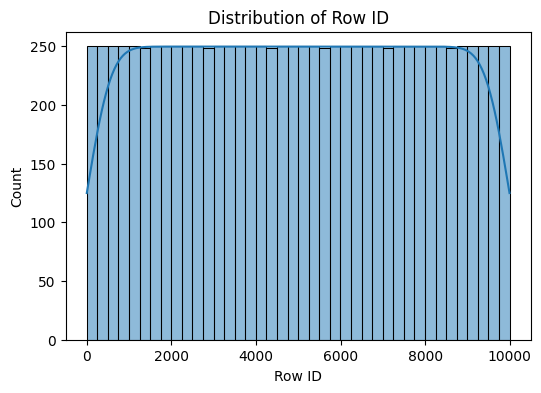

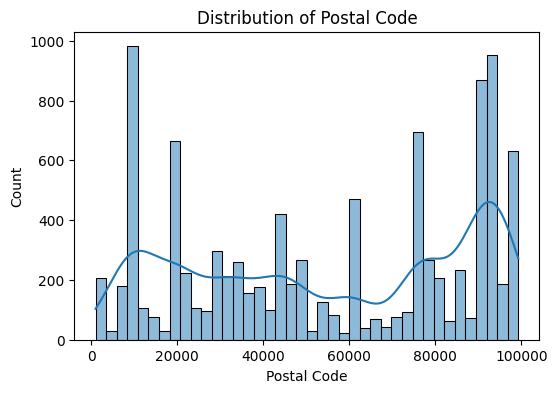

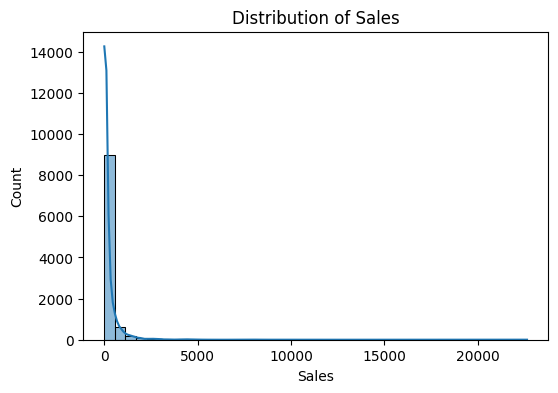

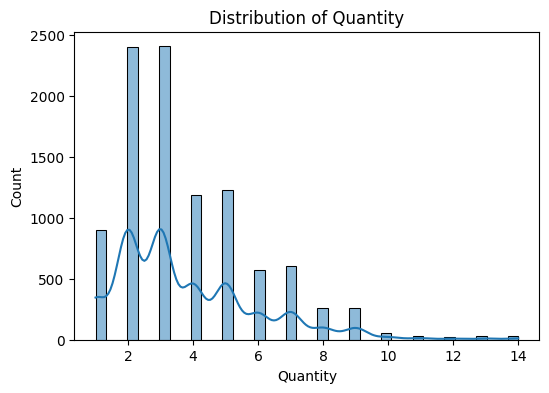

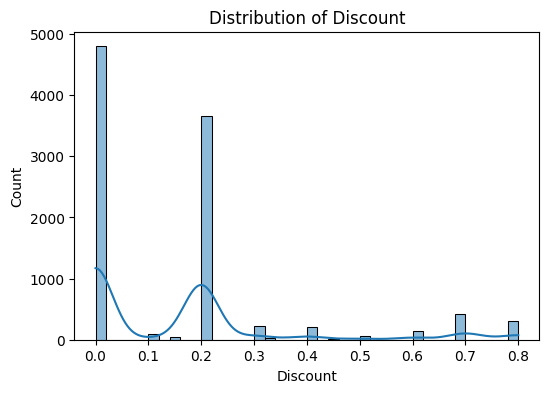

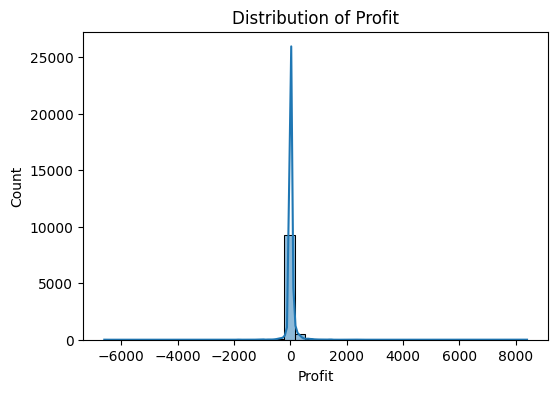

In [23]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Step 6: Categorical Features Count Plots

In [29]:
def plot_top_categories(df, column, n=10):
    """Plots the count of the top N categories in a column."""
    top_categories = df[column].value_counts().nlargest(n).index
    df_filtered = df[df[column].isin(top_categories)]
    plt.figure(figsize=(15, 8))
    sns.countplot(x=column, data=df_filtered, order=top_categories)
    plt.title(f"Count of Top {n} {column}")
    plt.xticks(rotation=90)
    plt.show()

Now I will use this function to plot the top 10 categories for each categorical column.

Skipping plotting for Order ID as it has too many unique values.
Skipping plotting for Order Date as it has too many unique values.
Skipping plotting for Ship Date as it has too many unique values.


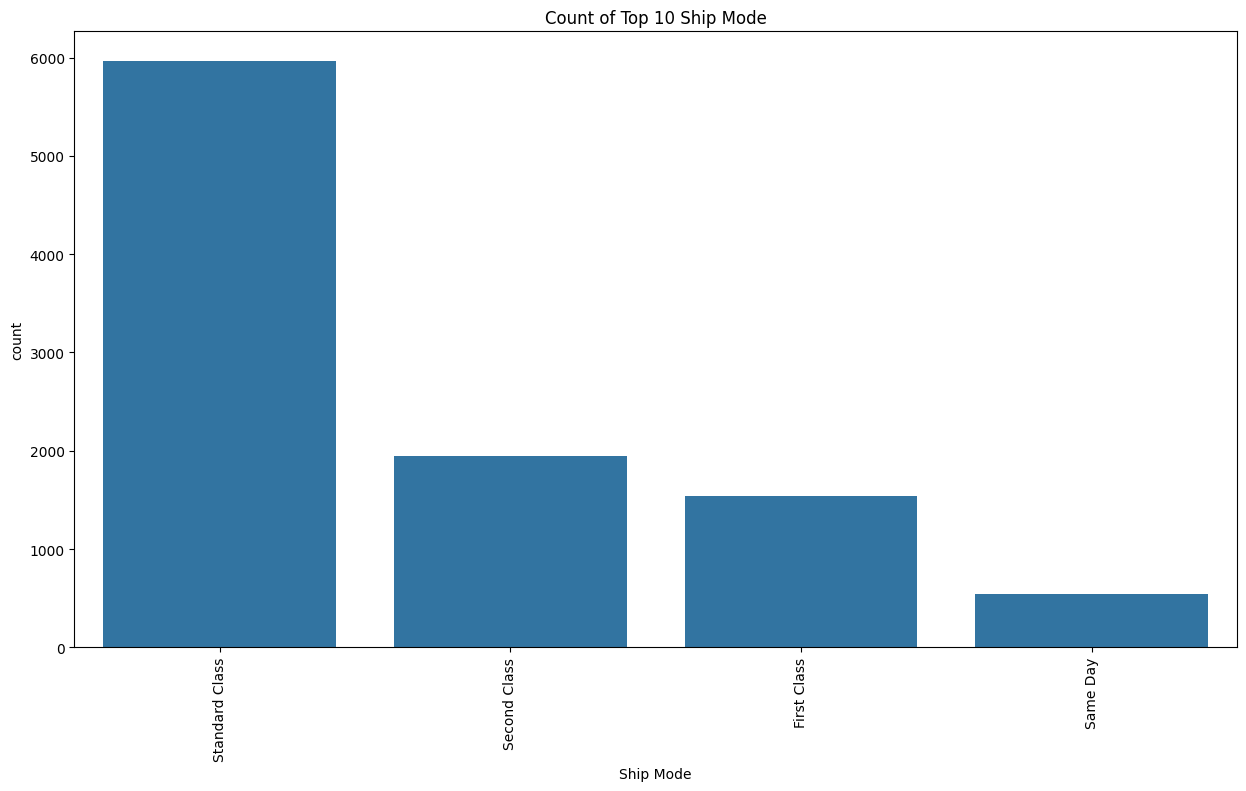

Skipping plotting for Customer ID as it has too many unique values.
Skipping plotting for Customer Name as it has too many unique values.


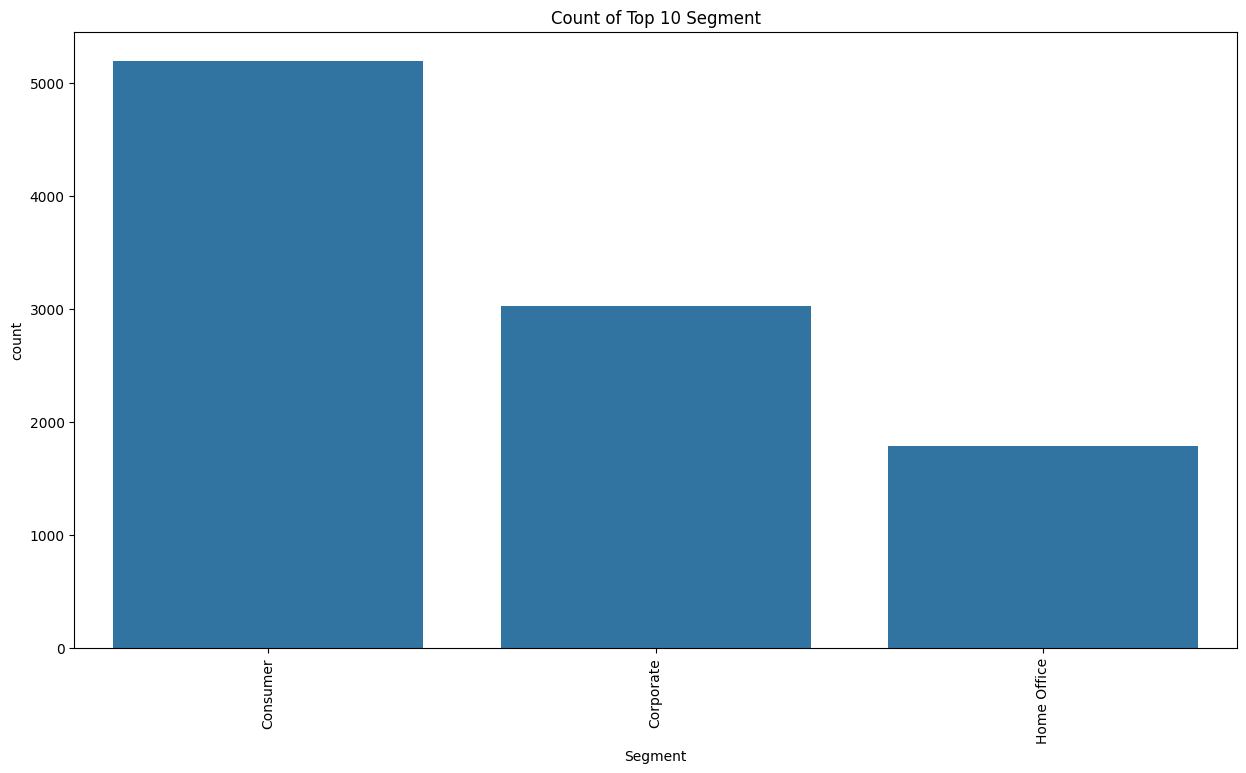

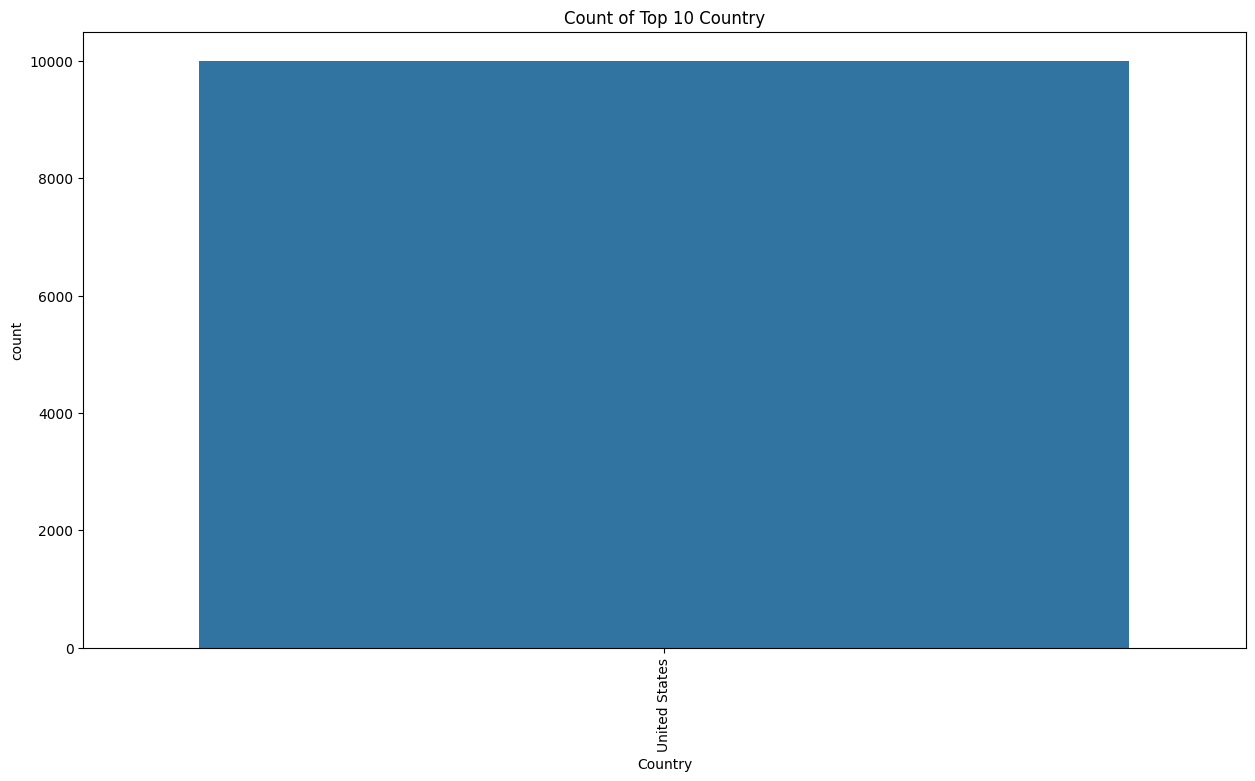

Skipping plotting for City as it has too many unique values.


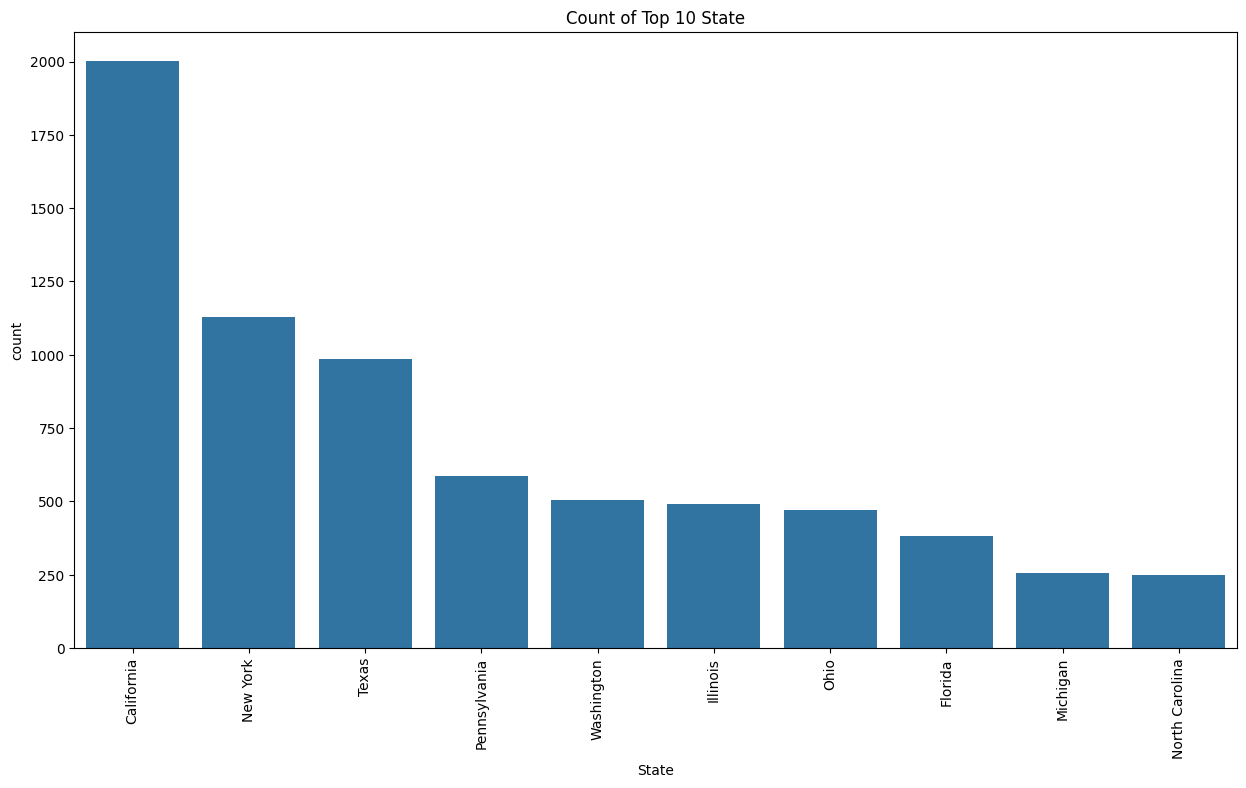

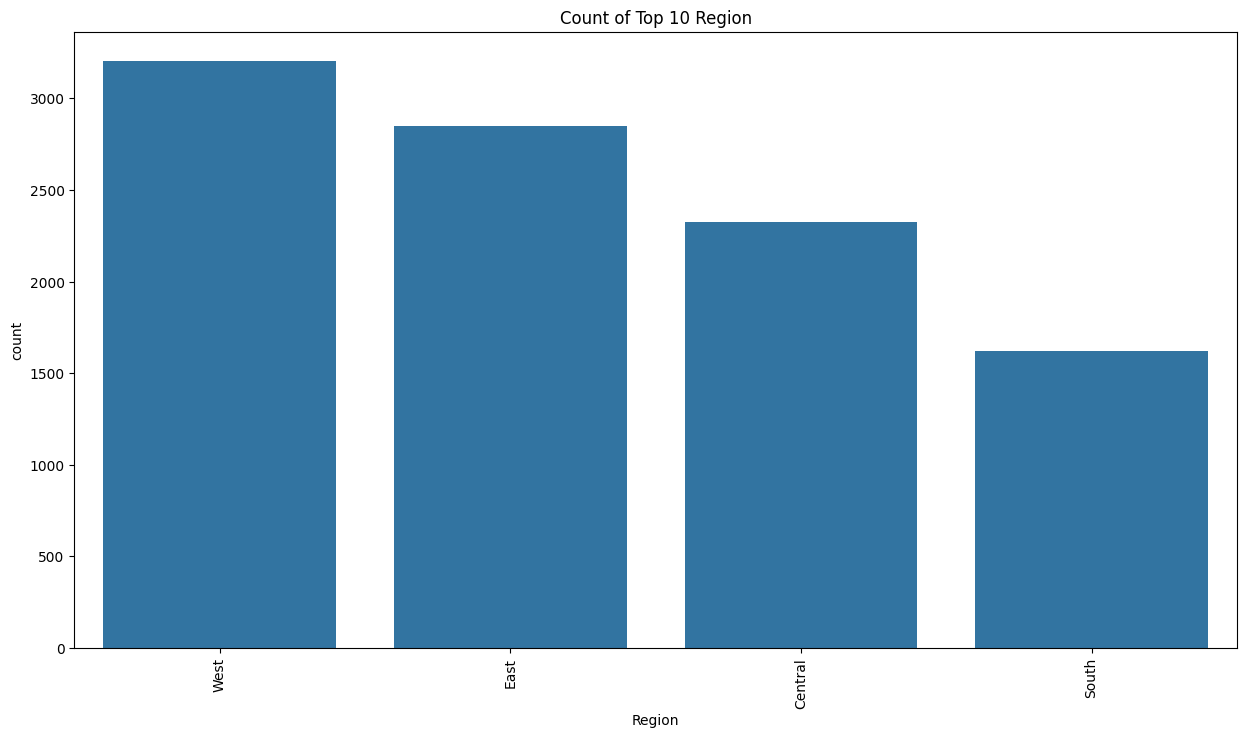

Skipping plotting for Product ID as it has too many unique values.


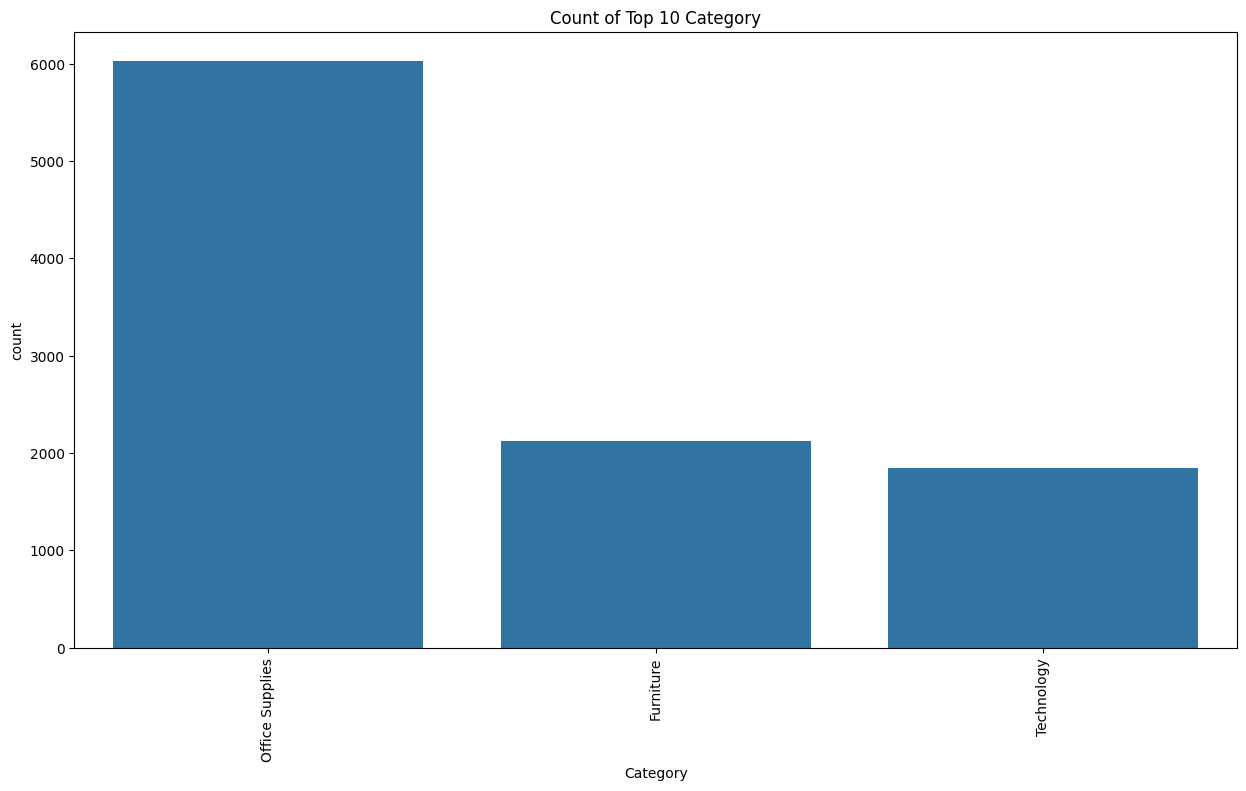

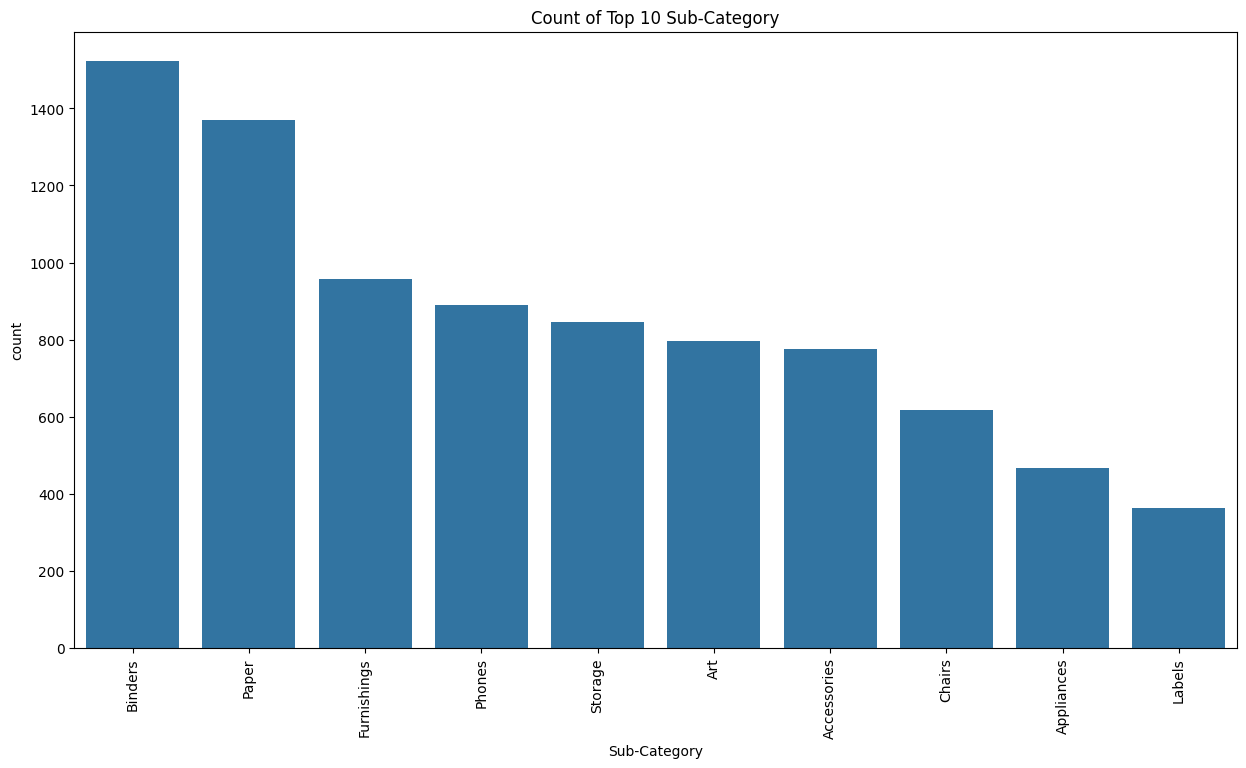

Skipping plotting for Product Name as it has too many unique values.


In [27]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    # Exclude columns with too many unique values that would still be congested
    if df[col].nunique() <= 50: # You can adjust this threshold
        plot_top_categories(df, col, n=10)
    else:
        print(f"Skipping plotting for {col} as it has too many unique values.")

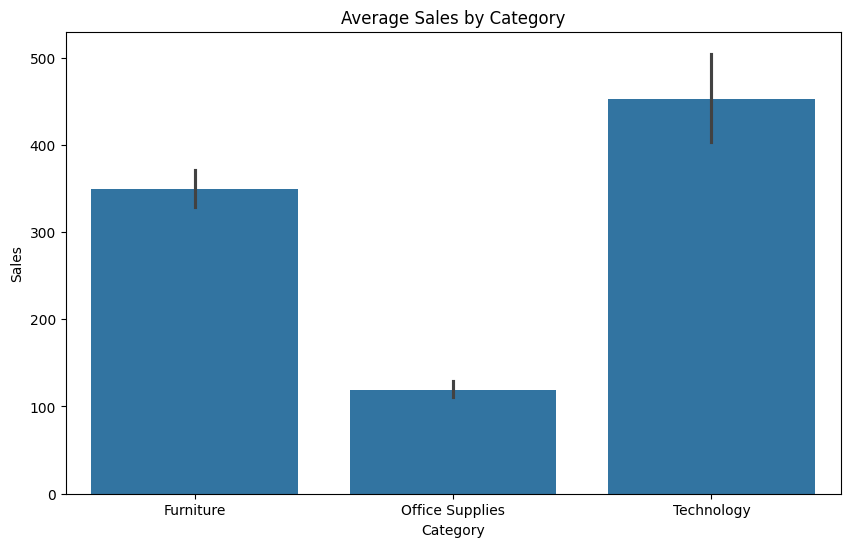

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Average Sales by Category')
plt.show()

# Step 7: Correlation Analysis (Numerical Variables)

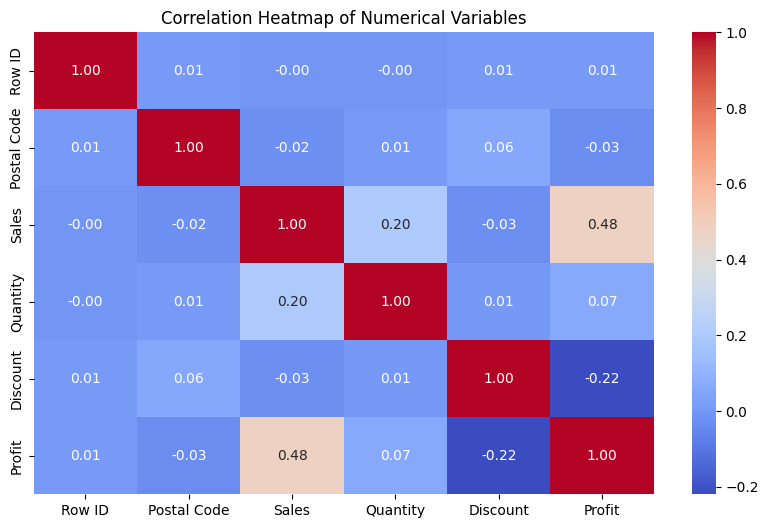

In [31]:
plt.figure(figsize=(10,6))
numerical_df = df.select_dtypes(include=np.number) # Select only numerical columns
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f") # Compute correlation on numerical data
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Step 8: Boxplots for Outliers & Category vs Price

Skipping boxplot for Sales by Order ID as it has too many unique values for a clear boxplot.
Skipping boxplot for Sales by Order Date as it has too many unique values for a clear boxplot.
Skipping boxplot for Sales by Ship Date as it has too many unique values for a clear boxplot.


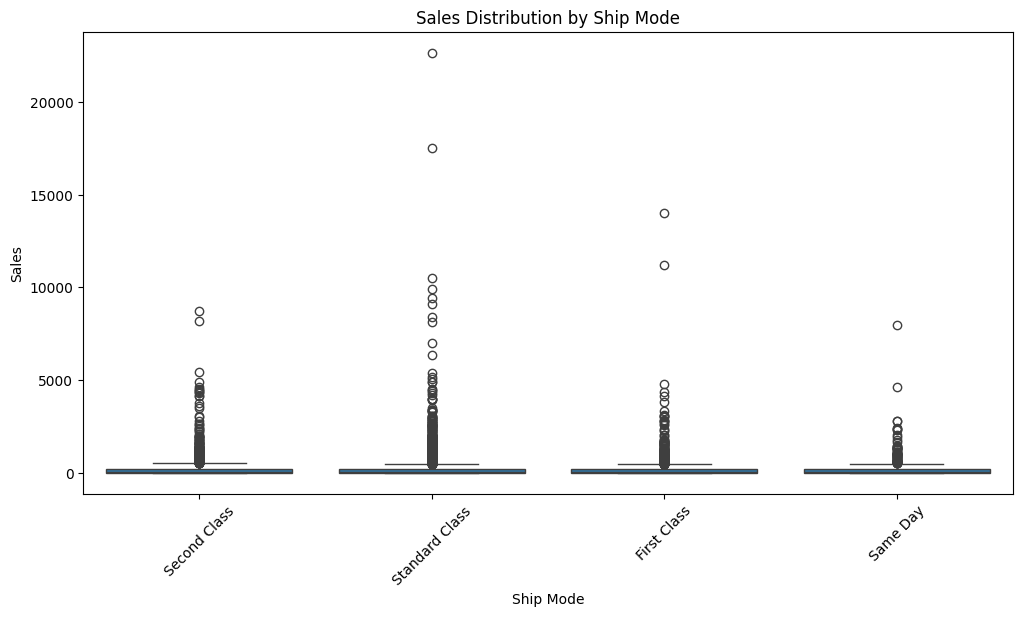

Skipping boxplot for Sales by Customer ID as it has too many unique values for a clear boxplot.
Skipping boxplot for Sales by Customer Name as it has too many unique values for a clear boxplot.


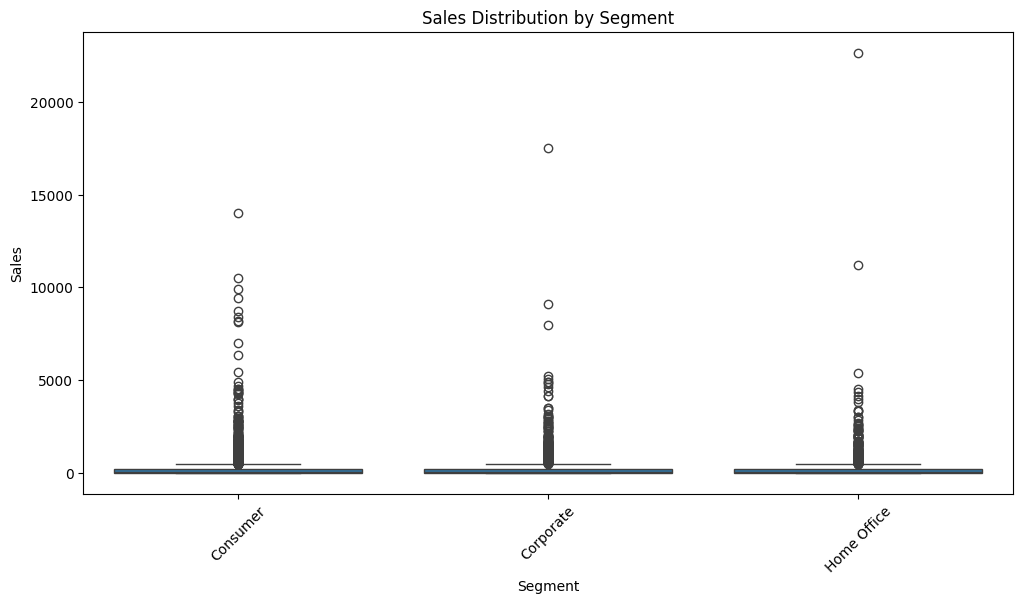

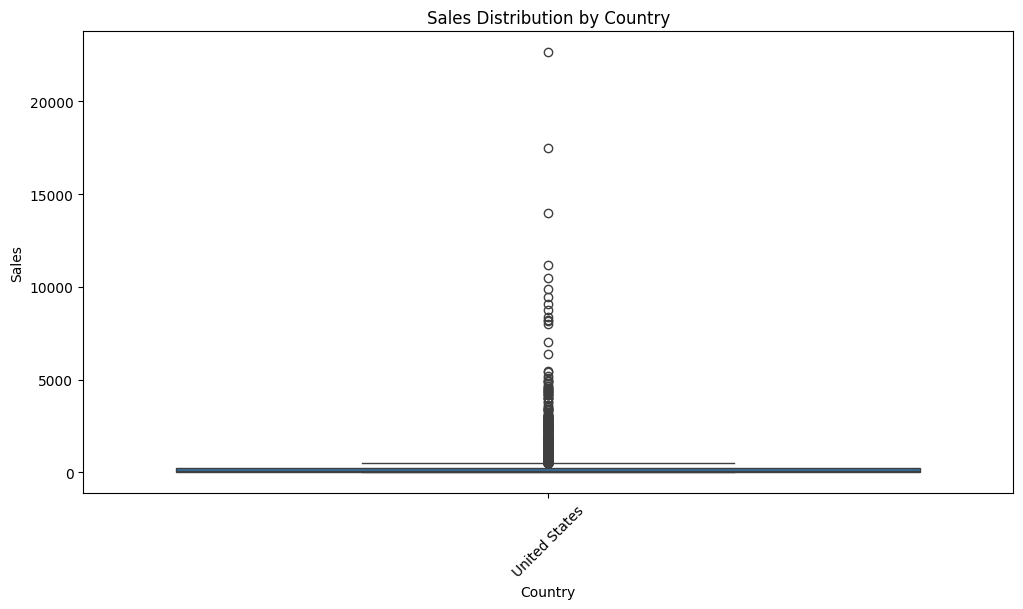

Skipping boxplot for Sales by City as it has too many unique values for a clear boxplot.
Skipping boxplot for Sales by State as it has too many unique values for a clear boxplot.


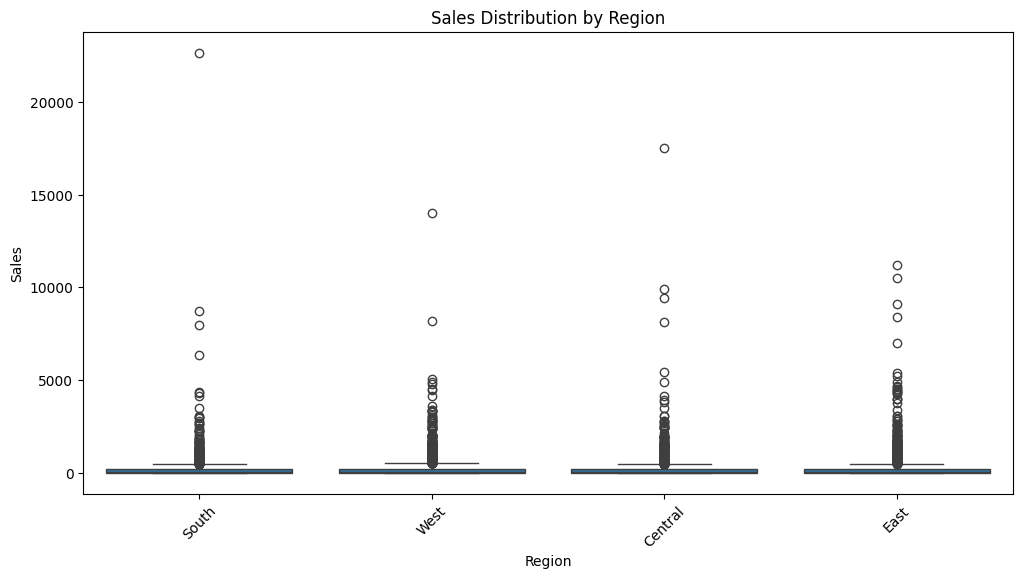

Skipping boxplot for Sales by Product ID as it has too many unique values for a clear boxplot.


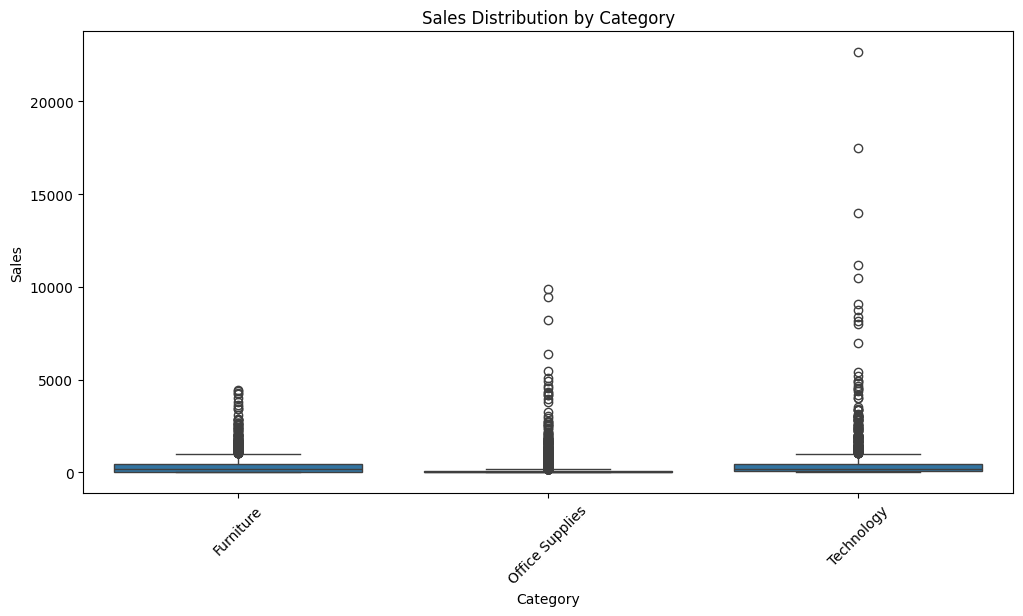

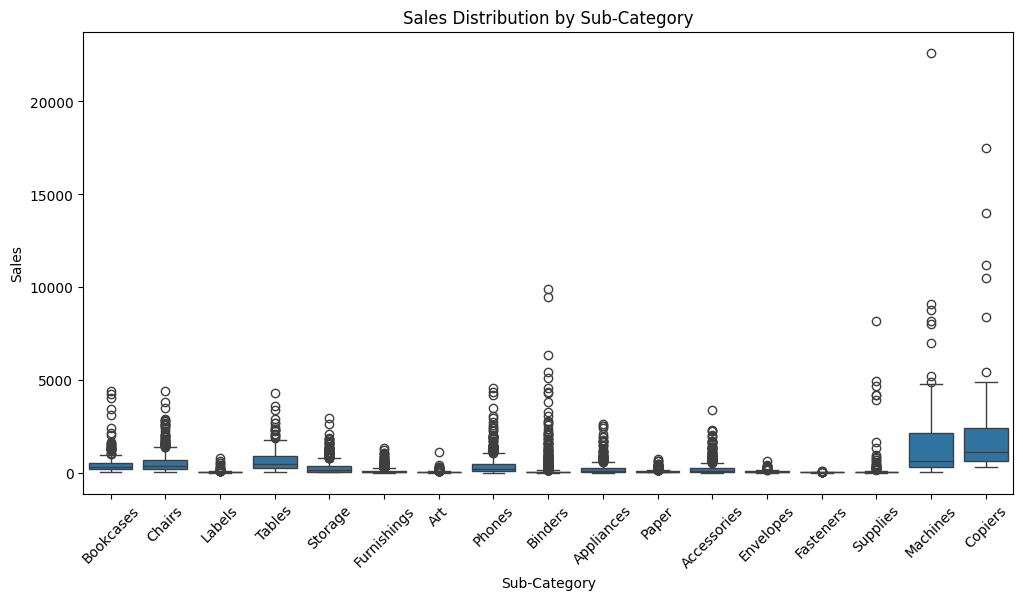

Skipping boxplot for Sales by Product Name as it has too many unique values for a clear boxplot.
Skipping boxplot for Profit by Order ID as it has too many unique values for a clear boxplot.
Skipping boxplot for Profit by Order Date as it has too many unique values for a clear boxplot.
Skipping boxplot for Profit by Ship Date as it has too many unique values for a clear boxplot.


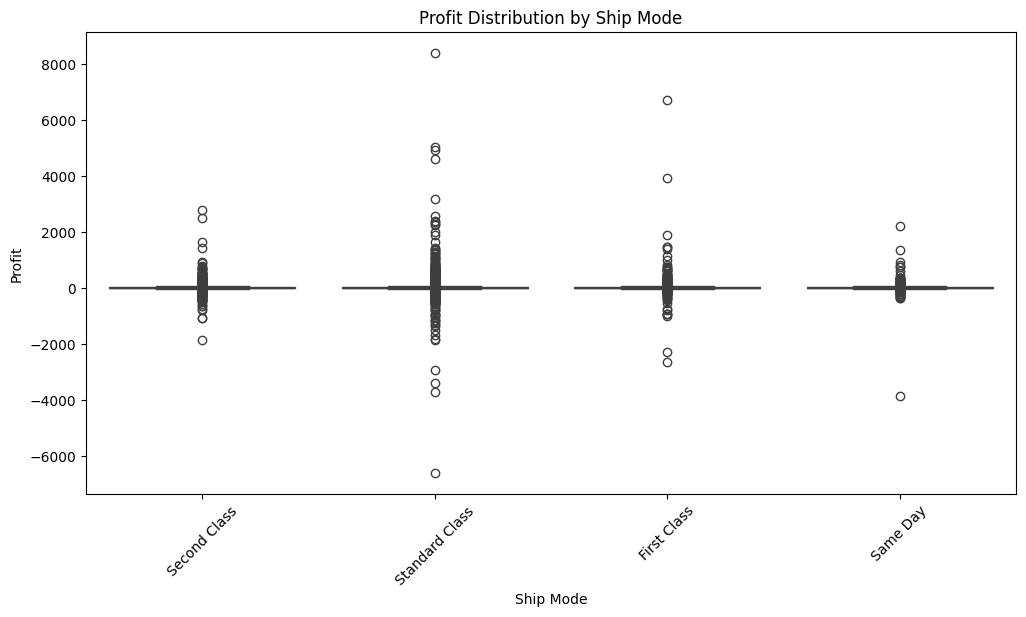

Skipping boxplot for Profit by Customer ID as it has too many unique values for a clear boxplot.
Skipping boxplot for Profit by Customer Name as it has too many unique values for a clear boxplot.


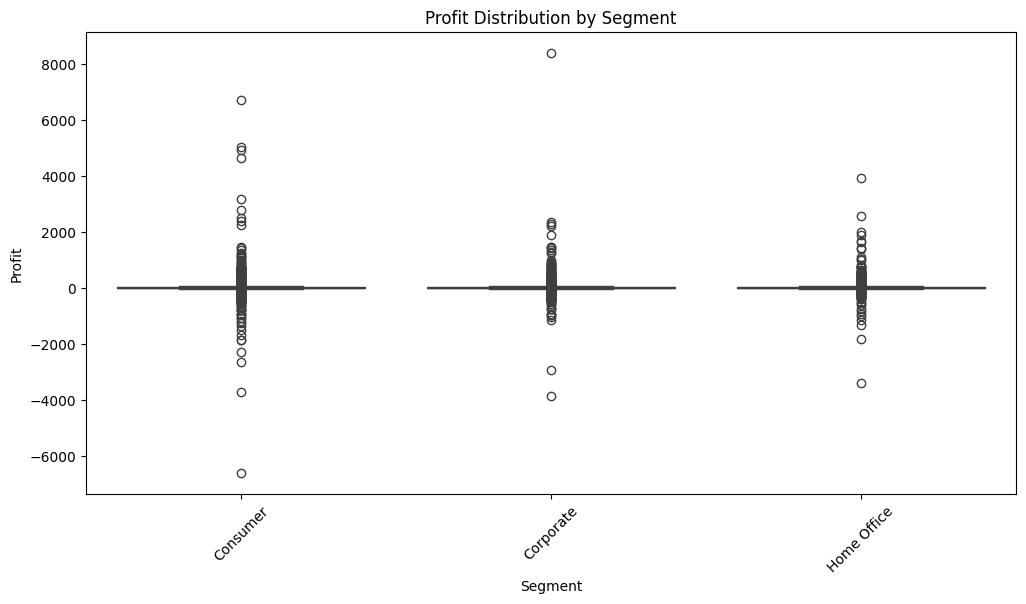

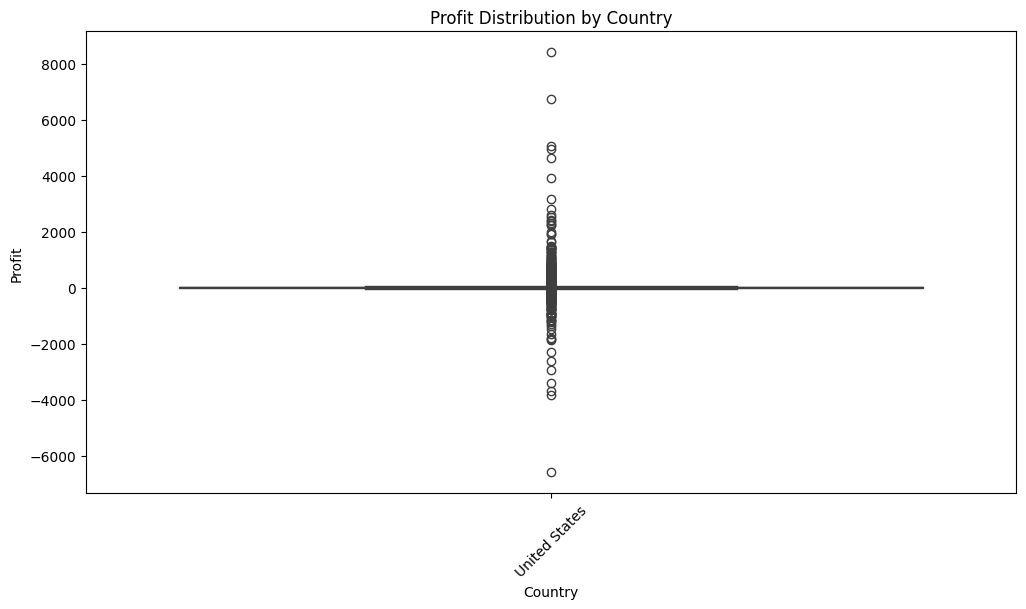

Skipping boxplot for Profit by City as it has too many unique values for a clear boxplot.
Skipping boxplot for Profit by State as it has too many unique values for a clear boxplot.


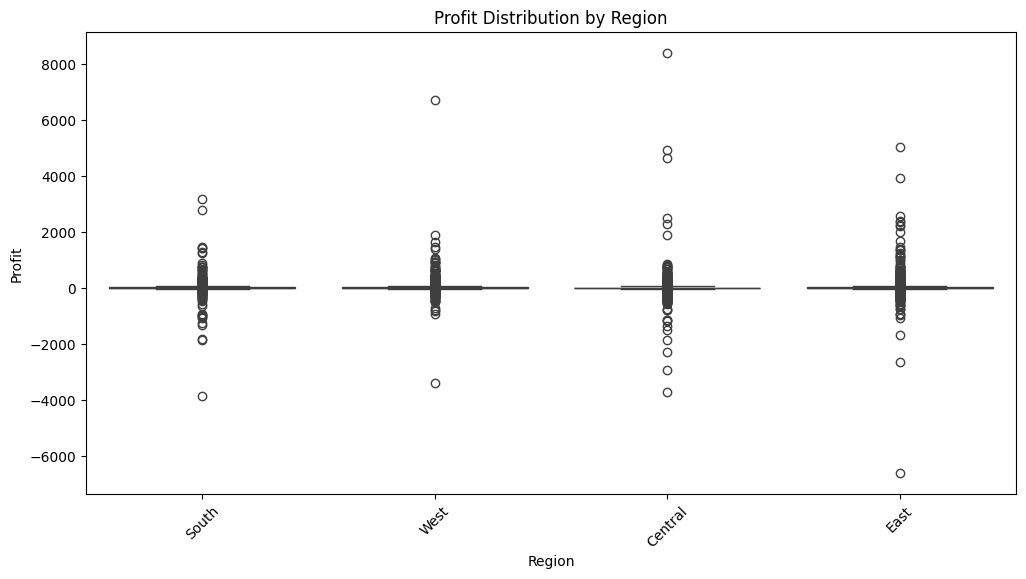

Skipping boxplot for Profit by Product ID as it has too many unique values for a clear boxplot.


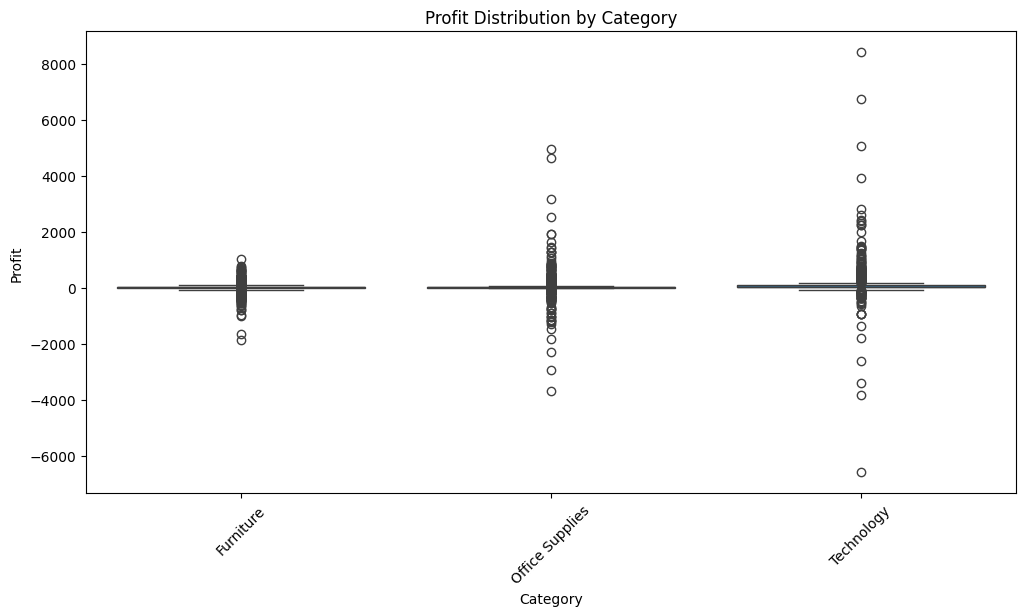

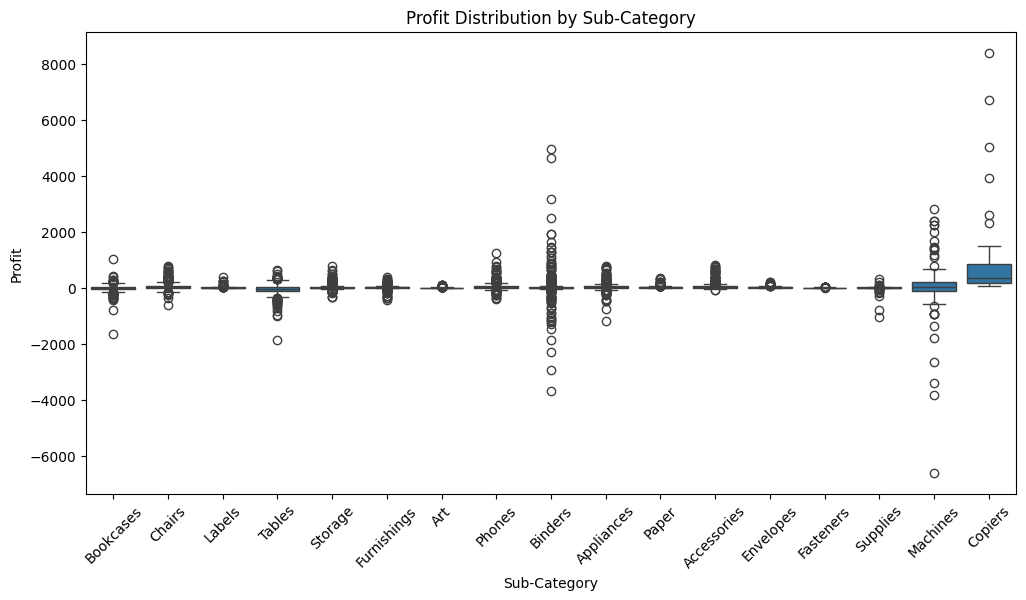

Skipping boxplot for Profit by Product Name as it has too many unique values for a clear boxplot.


In [36]:
numerical_cols_for_boxplot = ['Sales', 'Profit']
for num_col in numerical_cols_for_boxplot:
    for col in cat_cols:
        # Exclude columns with too many unique values that would still be congested for boxplots
        if df[col].nunique() <= 20: # Adjusted threshold for boxplots
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=col, y=num_col, data=df)
            plt.title(f"{num_col} Distribution by {col}")
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Skipping boxplot for {num_col} by {col} as it has too many unique values for a clear boxplot.")

# Step 9: Trends / Patterns Example

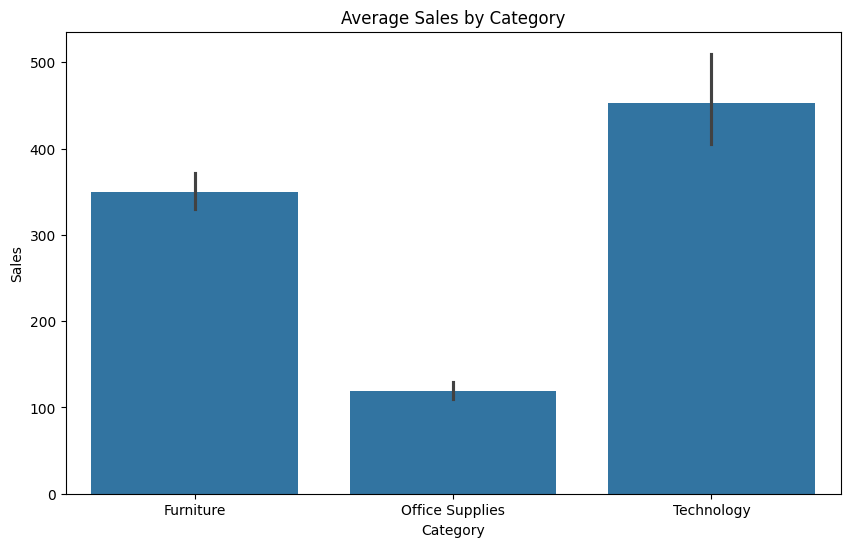

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Average Sales by Category')
plt.show()

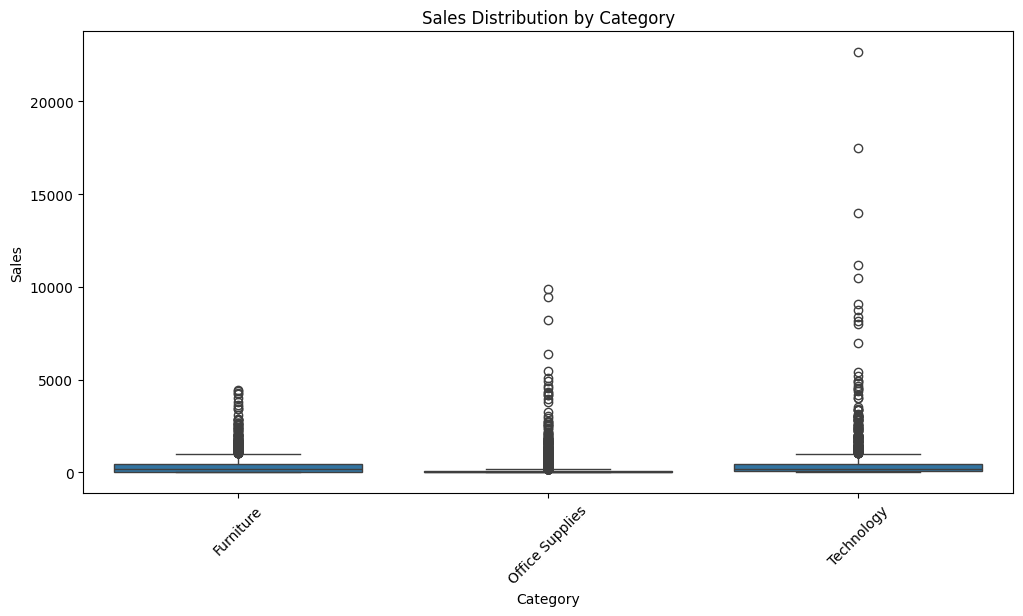

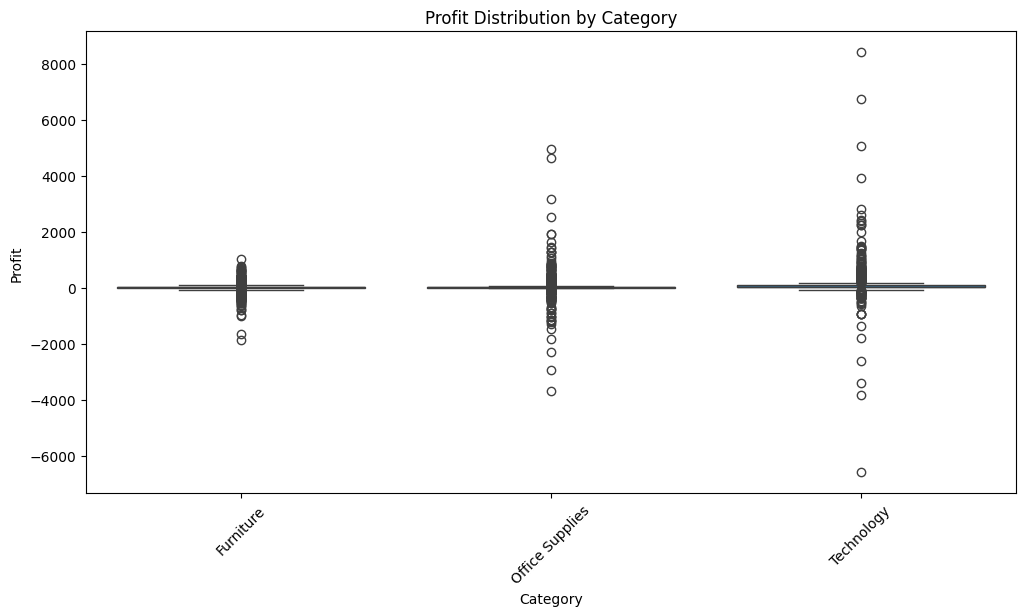

In [39]:
numerical_cols_for_boxplot = ['Sales', 'Profit']
for num_col in numerical_cols_for_boxplot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Category', y=num_col, data=df)
    plt.title(f"{num_col} Distribution by Category")
    plt.xticks(rotation=45)
    plt.show()